<h1 style="font-size:3rem;color:green;">Neural Networks for Binary Digit Recognition

# Contents

## 1. <u>Introduction</u>

This project focuses on building a neural network using TensorFlow/Keras to classify handwritten binary digits (0 and 1) from 20x20 grayscale images. Each image is represented as a flattened 400-pixel feature vector with a corresponding binary label. The model consists of an input layer (400 neurons), a hidden layer (25 neurons with ReLU activation), and an output layer (sigmoid activation) for binary classification. It is trained using the Adam optimizer and binary cross-entropy loss to minimize errors. Model performance is evaluated using accuracy, precision, recall, and a confusion matrix, with further hyperparameter tuning to enhance classification accuracy.

## 2. <u>Problem Statement</u>

Handwritten recognition is a fundamental task in machine learning, largely used in optical character recognition (OCR), document digitization and automated form processing. Traditional machine learning techniques rely on handcrafted features, but deep learning approaches, particularly neural networks offer a more effective solution for classifying handwritten characters. 
The goal of this project is to develop a neural network model capabale of accurately classifying handwritten digits as either 0 or 1 using machine learning techniques.

Where:
- y = 0: The image represents digit 0.
- y = 1: The image represents digit 1.

## 3. <u>Dataset</u>

### 3.1 Dataset Description

The dataset used in this project consists of handwritten binary digits (0 and 1) represented as grayscale images of size 20 X 20 pixels.  Each image is flattened into a single row of numerical features (400 values), where each value corresponds to the graysclae intensity of a pixel.

The dataset includes:
1. Features (X/pixels): Each row contains 400 numerical values stored in a flattened format
2. Labels (Y): A single binary value (0 or 1) indicating the handwritten digit. 
    - y = 0 image represents digit 0 
    - y = 1 image represents 1

In [18]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

### 3.2 Load Dataset

In [19]:
# Load dataset

data = pd.read_csv("D:/Data Analytics Courses/3rd Semester - Spring 2025/Course Materials/DAT 514/datasets/binary_digits.csv")
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 400)
Shape of y: (1000,)


### 3.3 Visualize Data

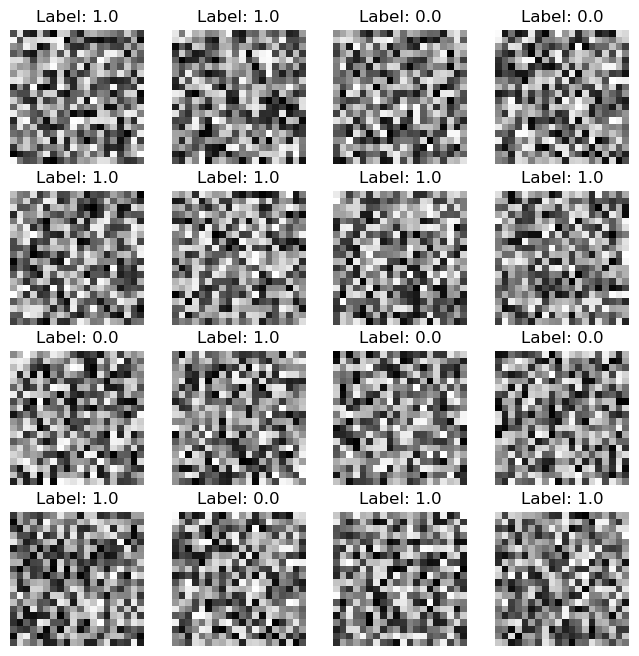

In [20]:
# Visualize random samples
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(X.shape[0])
    ax.imshow(X[index].reshape(20, 20).T, cmap='gray')
    ax.set_title(f"Label: {y[index]}")
    ax.axis('off')
plt.show()

## 4. <u>Neural Network Architecture</u>

The architecture consists of:
- <u>Input layer</u>: The input layer consists of 400 neurons/features, corresponding to the 400 pixel values extracted from each 20X20 grayscale image.
- <u>Hidden layer</u>: The hidden layer is responsible for learning meaningful patterns from the input data. It consists of 25 neurons, each fully connected to all 400 neurons in the input layer.  Each neuron applies an activation function known as Rectified Linear Unit(ReLU).  This activation introduces non-linearity into the model, enabling it to learn complex decision boundaries that separate digit 0s from 1s.
- <u>Output layer</u>: The output layer consists of 1 unit, which determines the final classification of the digit.  This neuron is also connected to all 25 neurons from the previous hidden layer, and applies the sigmoid activation function to convert the output into a probability value between 0 and 1, making it suitbale for binary classification.

## 5. <u>Implementation in TensorFlow/Keras</u>

### 5.1 Build the model

In [21]:
# Define the model
model = Sequential([
                    Dense(25, activation='relu', input_shape=(400,)),
                    Dense(1, activation='sigmoid')
                   ])

# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                10025     
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 10,051
Trainable params: 10,051
Non-trainable params: 0
_________________________________________________________________


### 5.2 Compile and Train the Model

In [22]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 [==============================] - 0s 6ms/step - loss: 0.7552 - accuracy: 0.4963 - val_loss: 0.7145 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.5225 - val_loss: 0.7002 - val_accuracy: 0.5050
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5213 - val_loss: 0.7144 - val_accuracy: 0.4750
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5400 - val_loss: 0.7064 - val_accuracy: 0.5200
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5550 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5900 - val_loss: 0.7087 - val_accuracy: 0.4950
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.5987 - val_loss: 0.7209 - val_accuracy: 0.5000
Epoch 8/20
25/25 [==

### 5.3 Visualize Training Performance

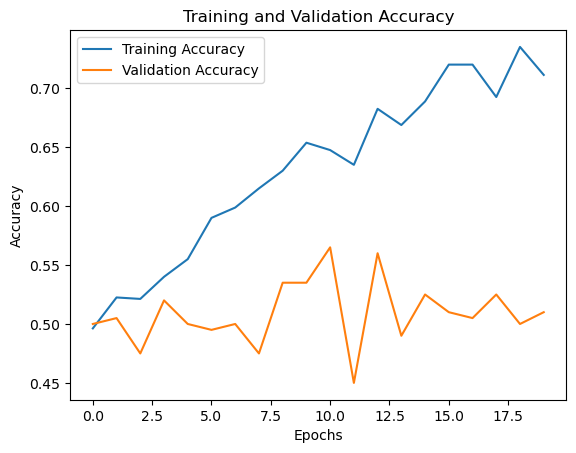

In [23]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## 6. <u>Evaluate the Model</u>

In [24]:
# Predict labels
y_pred = (model.predict(X) >= 0.5).astype(int)

# Print classification report
print(classification_report(y, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

32/32 [==============================] - 0s 976us/step
              precision    recall  f1-score   support

         0.0       0.63      0.89      0.73       517
         1.0       0.78      0.43      0.56       483

    accuracy                           0.67      1000
   macro avg       0.70      0.66      0.64      1000
weighted avg       0.70      0.67      0.65      1000

Confusion Matrix:
 [[459  58]
 [275 208]]


## 7. <u>Experimentation with Hyperparameters</u>

In [26]:
model = Sequential([
    Dense(50, activation='tanh', input_shape=(400,)),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                20050     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 20,101
Trainable params: 20,101
Non-trainable params: 0
_________________________________________________________________


## 8. <u>Conclusion</u>

This project successfully implemented a neural network-based classifier for distinguishing between handwritten digits 0 and 1. Using a dataset of 20x20 grayscale images, the model was trained on flattened pixel representations and achieved an accuracy of 67%, meaning it correctly classified 67% of images.  

To better understand the classification performance, we analyze precision, recall, and F1-score for each digit. For digit 0, the model had a precision of 63%, meaning that when it predicted a 0, it was correct 63% of the time. However, its recall was significantly higher at 89%, indicating that the model successfully identified the majority of actual 0s in the dataset. The F1-score of 73% reflects a balance between precision and recall, confirming strong performance in recognizing digit 0. On the other hand, the performance for digit 1 was weaker. The model had a precision of 78%, meaning that when it predicted a 1, it was correct 78% of the time. However, its recall was much lower at 43%, indicating that it failed to identify a large portion of actual 1s, frequently misclassifying them as 0s. The F1-score of 56% highlights the modelâ€™s struggle in recognizing digit 1, suggesting a bias toward classifying images as 0 more often than 1.

Despite achieving reasonable accuracy, the model exhibited considerable bias towards digit 0, making it significantly better at recognizing one class over the other.  This issue could be attributed in part due to imbalanced learning, where the models decision boundary favored the more easily recognizable digit.  Additionally, the absence of explicit normalization in the initial implementation may have affected training efficiency. To improve performance, several strategies can be explored, including but not limited to;
- Normalizing pixel values to the [0,1] range; normalizing pixel values to the [0,1] range would ensure stable gradient updates and faster convergence.
- Increasing model complexity; Adding more hidden layers, neurons, and regularization techniques could improve the models ability to learn diverse features.
- Since the dataset consists of image-like data, using a Convolutional Neural Network (CNN) could prove more effective.  More so as CNNs are specifically designed for image classification tasks, as they effectively capture local patterns and spatial relationships within an image. 

Overall, this project provided valuable insights into binary digit classification using neural networks, highlighting both the strengths and limitations of fully connected architectures.